In [1]:
import pandas, numpy
from os import path
from cltpack import load_train_data, Agent_Algorithm
from cltpack.globals import LOAD_TRAIN_DATA_KWARGS, DATA_PATH, LOGS_PATH

from matplotlib import pyplot
from matplotlib.ticker import FuncFormatter

## Pipeline_1
Data_Proprocessing

In [2]:
data_path = path.join(DATA_PATH, "train.feather")
train_data = pandas.read_feather(data_path)

In [3]:
train_data.sample(15)

,dst_port,flow_duration,totlen_fwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,...,active_std,active_max,active_min,idle_mean,idle_std,idle_min,intrusion,protocol_0,protocol_6,protocol_17
598727,51109,0.999999,3.829856e-06,0.000900,0.021233,0.000464,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.063829,0.063829,0.000070,0.000088,0.000031,0.0,0,1,0
5746037,53,0.999870,5.540479e-07,0.000621,0.027397,0.000000,0.001550,0.069178,0.002981,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,1
701898,80,0.999876,6.717831e-07,0.001505,0.000000,0.002636,0.003545,0.000000,0.001705,0.005416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0
5439824,53,0.999869,4.709407e-07,0.001055,0.046575,0.000000,0.002026,0.090411,0.003896,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,1
1856295,443,0.999869,5.332711e-07,0.000714,0.000000,0.001275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0
3626872,3389,0.999874,9.959012e-06,0.011251,0.000000,0.010686,0.018094,0.000000,0.006387,0.019012,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0
4155496,52113,0.999875,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0
2819951,0,0.999870,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0
5471767,52129,0.999869,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0
248234,3389,0.999871,7.922885e-06,0.010506,0.000000,0.012389,0.018002,0.000000,0.006667,0.020168,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0


In [4]:
train_loader, valid_loader = load_train_data(data = (train_data.drop(['intrusion'], axis=1), train_data[['intrusion']]),
                                      size = .005,
                                      valid_rate = .45,
                                      batch_size = 1024,
                                      distribution = None,
                                      sparse_y = True
                                     )


## Pipeline_2
Federated learning using the client package 

In [5]:
from cltpack.client import Agent_Algorithm

In [6]:
cid = 1
epochs = 3

In [7]:
AgentAlg = Agent_Algorithm(client_id=cid,
                           train_loader=train_loader,
                           valid_loader=valid_loader,
                           distribution=None,
                           epochs=epochs)

In [8]:
AgentAlg(server_address = '127.0.0.1', port = 1234)


Starting communication...

Round: 1
Training >> Epoch: 1 | Loss: 6.178e-04 | Accuracy: 78.1590 %
Training >> Epoch: 2 | Loss: 6.138e-04 | Accuracy: 78.6570 %
Training >> Epoch: 3 | Loss: 6.109e-04 | Accuracy: 79.1706 %
Validation >> Loss: 6.343e-04 | Accuracy: 86.4873 %

Round: 2
Training >> Epoch: 1 | Loss: 6.085e-04 | Accuracy: 79.7930 %
Training >> Epoch: 2 | Loss: 6.050e-04 | Accuracy: 80.0109 %
Training >> Epoch: 3 | Loss: 6.007e-04 | Accuracy: 80.6334 %
Validation >> Loss: 6.301e-04 | Accuracy: 86.4873 %

Round: 3
Training >> Epoch: 1 | Loss: 5.985e-04 | Accuracy: 81.0924 %
Training >> Epoch: 2 | Loss: 5.945e-04 | Accuracy: 81.2947 %
Training >> Epoch: 3 | Loss: 5.917e-04 | Accuracy: 81.5593 %
Validation >> Loss: 6.247e-04 | Accuracy: 86.4873 %

Round: 4
Training >> Epoch: 1 | Loss: 5.888e-04 | Accuracy: 81.8161 %
Training >> Epoch: 2 | Loss: 5.856e-04 | Accuracy: 82.3763 %
Training >> Epoch: 3 | Loss: 5.833e-04 | Accuracy: 82.3763 %
Validation >> Loss: 6.183e-04 | Accuracy: 86.

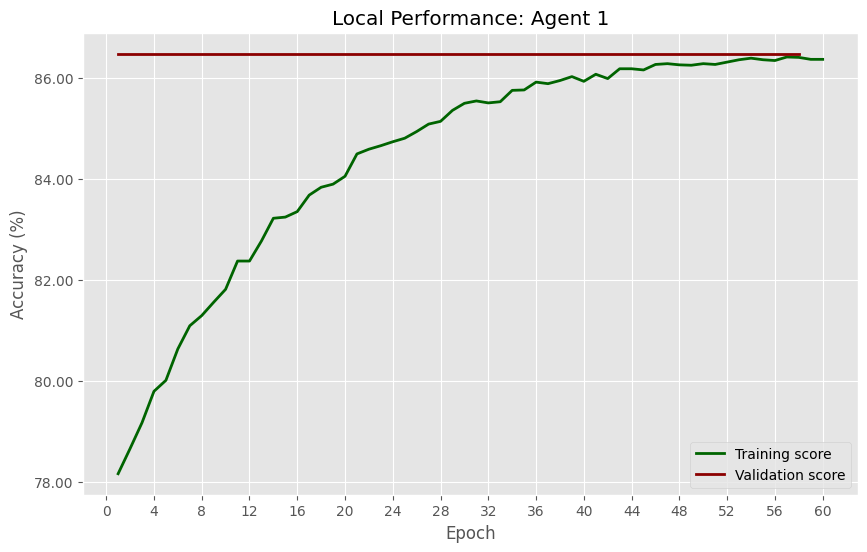

In [9]:
def scientific_notation(x, pos):
    return '{:.2f}'.format(x*100)

logs_path = path.join(LOGS_PATH, f"train_{cid}_logs.csv")
logs_df = pandas.read_csv(logs_path)
logs_df.index = logs_df.index + 1

pyplot.style.use('ggplot')
ax = logs_df['Accuracy'].plot(kind='line', 
                                figsize=(10, 6), 
                                title=f"Local Performance: Agent {cid}", 
                                xlabel='Epoch', 
                                ylabel='Accuracy (%)', 
                                label='Training score', 
                                color='darkgreen', 
                                linewidth=2)
ax.set_xticks(range(0, len(logs_df.index)+1, 4))

logs_path = path.join(LOGS_PATH, f"valid_{cid}_logs.csv")
logs_df = pandas.read_csv(logs_path)
logs_df.index = [int(i)*epochs + 1 for i in logs_df.index]

ax = logs_df['Accuracy'].plot(kind='line', 
                                label='Validation score', 
                                color='darkred', 
                                linewidth=2)
ax.legend(loc='lower right')
ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation))

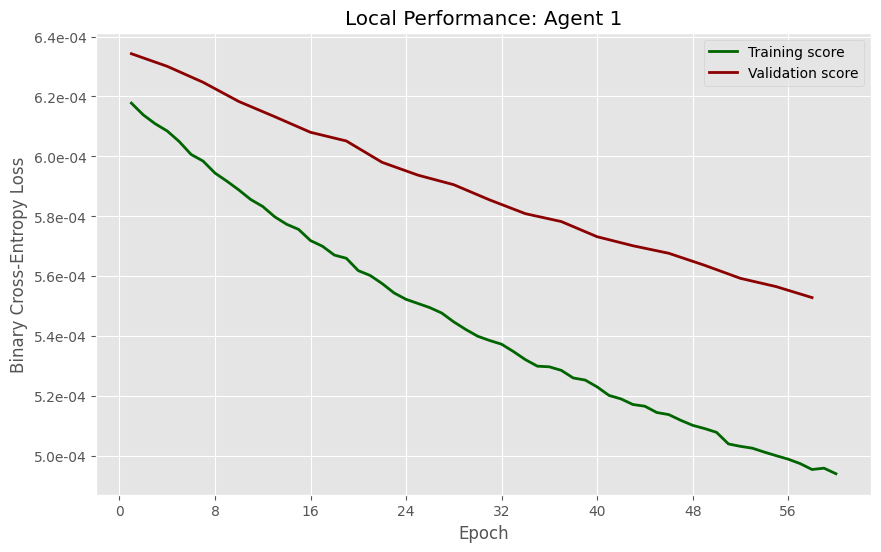

In [10]:
def scientific_notation(x, pos):
    return '{:.1e}'.format(x)

logs_path = path.join(LOGS_PATH, f"train_{cid}_logs.csv")
logs_df = pandas.read_csv(logs_path)
logs_df.index = logs_df.index + 1

pyplot.style.use('ggplot')
ax = logs_df['Loss'].plot(kind='line', 
                                figsize=(10, 6), 
                                title=f"Local Performance: Agent {cid}", 
                                xlabel='Epoch', 
                                ylabel='Binary Cross-Entropy Loss', 
                                label='Training score', 
                                color='darkgreen',
                                linewidth=2)
ax.set_xticks(range(0, len(logs_df.index)+1, 8))

logs_path = path.join(LOGS_PATH, f"valid_{cid}_logs.csv")
logs_df = pandas.read_csv(logs_path)
logs_df.index = [int(i)*epochs + 1 for i in logs_df.index]

ax = logs_df['Loss'].plot(kind='line', 
                                label='Validation score', 
                                color='darkred', 
                                linewidth=2)
ax.legend(loc='upper right')
ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation))